In [51]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import seaborn as sns
import sys, os
import matplotlib.pyplot as plt
import yfinance as yf

c:\Users\tsego\OneDrive\Desktop\Programming\BetaVariationAnalysis\dynamic-beta-modeling\Notebooks


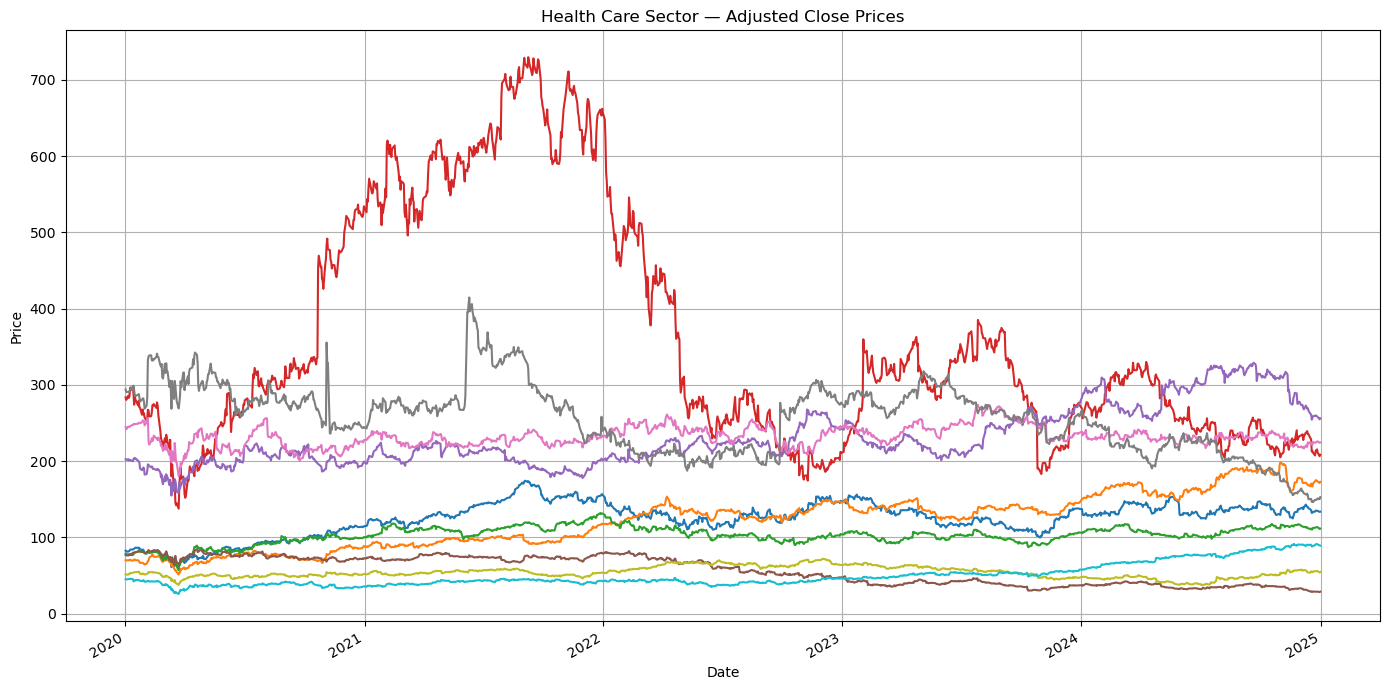

In [52]:
print(os.getcwd())
df = pd.read_parquet('../Data/Health_Care_tickers.parquet')
df.head()

# Optional: set index if needed
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)

# Plot all tickers
df.iloc[:,:10].plot(figsize=(14, 7), legend=False)
plt.title('Health Care Sector — Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()
#df.plot(x='Date')

C:\Users\tsego\AppData\Local\Temp\ipykernel_24072\1538513485.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^SPX', start='2020-01-01', end='2025-01-01', progress=False)["Close"]


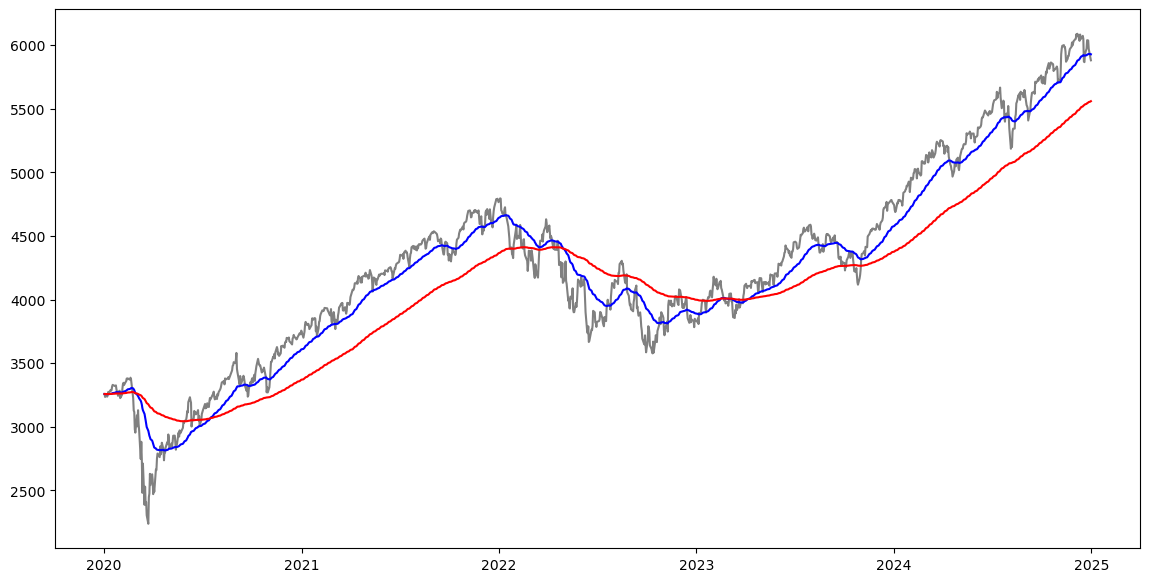

In [62]:
# We will use the Exponential Moving Average (EMA) for the SP500
sp500 = yf.download('^SPX', start='2020-01-01', end='2025-01-01', progress=False)["Close"]
sp500_short = sp500.ewm(span=50, adjust=False).mean()
sp500_long = sp500.ewm(span=200, adjust=False).mean()
plt.figure(figsize = (14, 7))
plt.plot(sp500, label='SP5500', color= 'grey')
plt.plot(sp500_short, label = '50 day EMA', color = 'blue')
plt.plot(sp500_long, label = '200 day EMA', color='red')

Text(0.5, 0, 'Date')

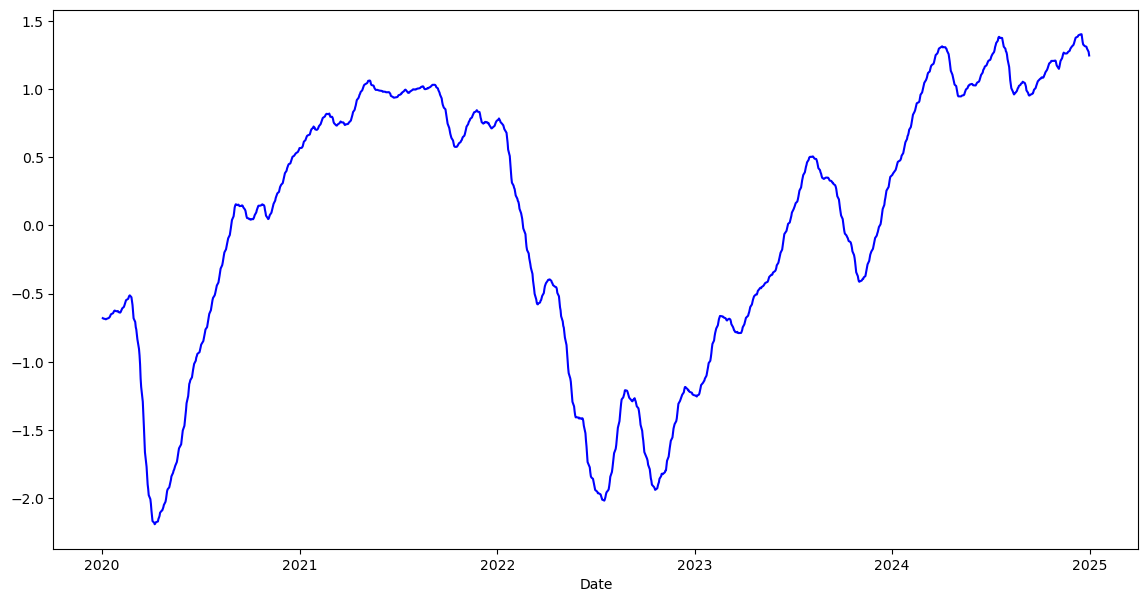

In [74]:
ema_difference = sp500_short-sp500_long
ema_difference = (ema_difference-ema_difference.mean())/ema_difference.std()
ema_difference.head()
plt.figure(figsize = (14, 7))
plt.plot(ema_difference, color='blue')
plt.xlabel("Date")


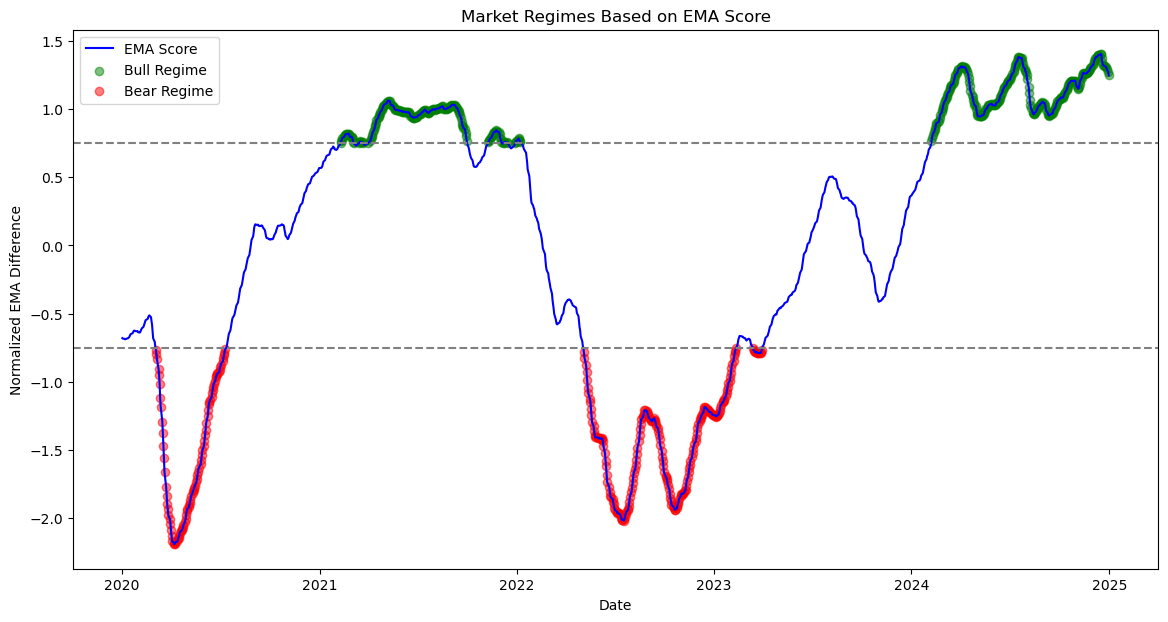

In [96]:
threshold = 0.75
market_regime = pd.DataFrame({'ema_score':ema_difference['^SPX']})
market_regime['Regime'] = 'neutral'
market_regime.loc[market_regime['ema_score']>threshold, 'Regime'] = 'bull'
market_regime.loc[market_regime['ema_score']<-threshold, 'Regime'] = 'bear'

plt.figure(figsize=(14, 7))
plt.plot(market_regime['ema_score'], label='EMA Score', color='blue')
bull = market_regime[market_regime['Regime'] == 'bull']
bear = market_regime[market_regime['Regime'] == 'bear']

plt.scatter(bull.index, bull['ema_score'], color='green', label='Bull Regime', alpha=0.5)
plt.scatter(bear.index, bear['ema_score'], color='red', label='Bear Regime', alpha=0.5)
plt.axhline(y=threshold, color='gray', linestyle='--')
plt.axhline(y=-threshold, color='gray', linestyle='--')
plt.legend()
plt.title('Market Regimes Based on EMA Score')
plt.xlabel('Date')
plt.ylabel('Normalized EMA Difference')
plt.show()